In [23]:
import numpy as np
import pandas as pd
import os
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, SubsetRandomSampler
from torchvision import datasets, transforms
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [24]:
device = "cuda" if torch .cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [25]:
df = pd.read_csv(r"C:\Users\actor\OneDrive\Documents\210090_Assignment_2\Adsorption_Data.csv")
df

,C(x1),H(x2),N(x3),Si(x4),BET(x5),Adorption Capacity(output)
0,12.8,1.16,0.38,7.51,8.75,0.144
1,6.5,0.57,0.04,3.34,3.69,0.334
2,8.7,0.54,0.21,40.98,33.37,0.452
3,3.5,0.35,0.12,22.05,7.55,0.333
4,7.2,0.71,0.03,3.16,1.97,0.383
5,9.7,0.98,0.34,58.88,58.00,0.366
6,10.9,0.74,0.32,6.07,46.00,0.544
7,2.5,0.32,0.17,28.01,22.00,0.436
8,58.6,2.10,0.38,0.38,38.03,1.160
9,69.1,1.77,0.86,0.53,111.00,2.400


In [26]:
class NeuralNetwork (nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear_relu_stack=nn.Sequential(
            nn.Linear(5,10),
            nn.ReLU(),
            nn.Linear(10,15),
            nn.ReLU(),
            nn.Linear(15,5),
            nn.ReLU(),
            nn.Linear(5,1)
           

        )

    def forward (self ,x_tensor):
        logits=self.linear_relu_stack(x_tensor)
        return logits
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=5, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=15, bias=True)
    (3): ReLU()
    (4): Linear(in_features=15, out_features=5, bias=True)
    (5): ReLU()
    (6): Linear(in_features=5, out_features=1, bias=True)
  )
)


In [27]:
x=df.drop(columns=['Adorption Capacity(output)'])
#y =df.iloc[:,-1]
y=df.drop(columns=['C(x1)',	'H(x2)'	,'N(x3)'	,'Si(x4)',	'BET(x5)'])
#y=reshape(47840,1, keepdims=True)
print(x.shape)
print(y.shape)


(35, 5)
(35, 1)


In [28]:
x_tensor=torch.tensor(x.values,dtype=torch.float32)
y_tensor=torch.tensor(y.values,dtype=torch.float32)
#y_tensor.unsqueeze(1)
#y_tensor.reshape(47840,1,keepdims)
print(y_tensor.shape)
dataset=TensorDataset(x_tensor,y_tensor)


num_samples = len(dataset)
indices = list(range(num_samples))
split = int(num_samples * 0.8) 
train_indices, val_indices = indices[:split], indices[split:]
train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(dataset, batch_size=1, sampler=train_sampler)
val_loader = DataLoader(dataset, batch_size=1, sampler=val_sampler)

torch.Size([35, 1])


In [29]:
loss_fn=nn.MSELoss()
optimizer=optim.Adam(model.parameters(), lr=1e-3)

In [30]:
def train (dataloader , model  ,loss_fn , optimizer):
    size=len(dataloader.dataset)
    model.train()
    for batch ,(x,y)in enumerate(dataloader):
        x,y=x.to(device), y.to(device)

        pred=model(x)
        loss=loss_fn(pred,y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch %100==0:
            loss,current=loss.item(),(batch+1)*len(x)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")



In [31]:
def test (dataloader , model , loss_fn):
    size = len(dataloader.dataset)
    num_batches=len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for x_tensor, y_tensor in dataloader:
            x_tensor, y_tensor = x_tensor.to(device), y_tensor.to(device)
            pred = model(x_tensor)
            test_loss += loss_fn(pred, y_tensor).item()
            #correct += (pred.argmax(1) == y_tensor).type(torch.float).sum().item()
    test_loss /= num_batches*35
    correct /= size
    print(f"Test Error: \n  Avg loss: {test_loss:>8f} \n")

In [32]:
epochs = 200
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(val_loader, model, loss_fn)
print("Done ig")

Epoch 1
-------------------------------
loss: 8.607687  [    1/   35]
Test Error: 
  Avg loss: 3.205056 

Epoch 2
-------------------------------
loss: 33.452332  [    1/   35]
Test Error: 
  Avg loss: 2.631910 

Epoch 3
-------------------------------
loss: 0.181055  [    1/   35]
Test Error: 
  Avg loss: 2.282698 

Epoch 4
-------------------------------
loss: 14.328625  [    1/   35]
Test Error: 
  Avg loss: 2.185814 

Epoch 5
-------------------------------
loss: 0.000022  [    1/   35]
Test Error: 
  Avg loss: 2.087936 

Epoch 6
-------------------------------
loss: 7.146009  [    1/   35]
Test Error: 
  Avg loss: 2.093756 

Epoch 7
-------------------------------
loss: 22.313807  [    1/   35]
Test Error: 
  Avg loss: 2.065316 

Epoch 8
-------------------------------
loss: 0.007198  [    1/   35]
Test Error: 
  Avg loss: 2.118387 

Epoch 9
-------------------------------
loss: 3.631294  [    1/   35]
Test Error: 
  Avg loss: 2.145115 

Epoch 10
-------------------------------
lo

                               C(x1)     H(x2)     N(x3)    Si(x4)   BET(x5)  \
C(x1)                       1.000000  0.661529  0.132219 -0.580041  0.440584   
H(x2)                       0.661529  1.000000  0.014156 -0.380672  0.163708   
N(x3)                       0.132219  0.014156  1.000000 -0.157786 -0.316263   
Si(x4)                     -0.580041 -0.380672 -0.157786  1.000000 -0.179075   
BET(x5)                     0.440584  0.163708 -0.316263 -0.179075  1.000000   
Adorption Capacity(output)  0.270624  0.001367 -0.186562 -0.092483  0.787414   

                            Adorption Capacity(output)  
C(x1)                                         0.270624  
H(x2)                                         0.001367  
N(x3)                                        -0.186562  
Si(x4)                                       -0.092483  
BET(x5)                                       0.787414  
Adorption Capacity(output)                    1.000000  


<AxesSubplot: >

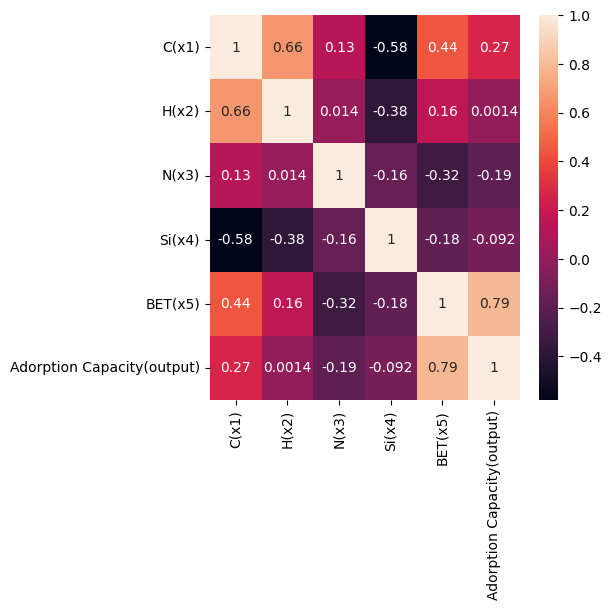

In [33]:
corr_matrix = df.corr()
print(corr_matrix)
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True)


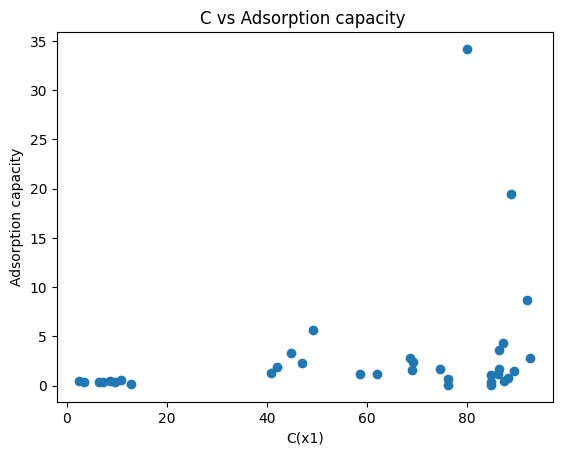

In [34]:
fig, ax = plt.subplots()
k=df.drop(columns=['H(x2)'	,'N(x3)'	,'Si(x4)',	'BET(x5)','Adorption Capacity(output)'])
ax.plot(k, y, 'o')


# Set the title and axis labels
ax.set_title('C vs Adsorption capacity ')
ax.set_xlabel('C(x1)')
ax.set_ylabel('Adsorption capacity')

# Show the plot
plt.show()

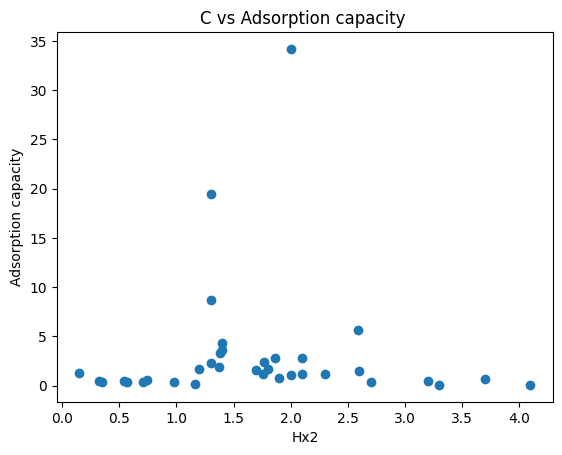

In [35]:
fig, ax = plt.subplots()
k=df.drop(columns=['C(x1)'	,'N(x3)'	,'Si(x4)',	'BET(x5)','Adorption Capacity(output)'])
ax.plot(k, y, 'o')


# Set the title and axis labels
ax.set_title('C vs Adsorption capacity ')
ax.set_xlabel('Hx2')
ax.set_ylabel('Adsorption capacity')

# Show the plot
plt.show()

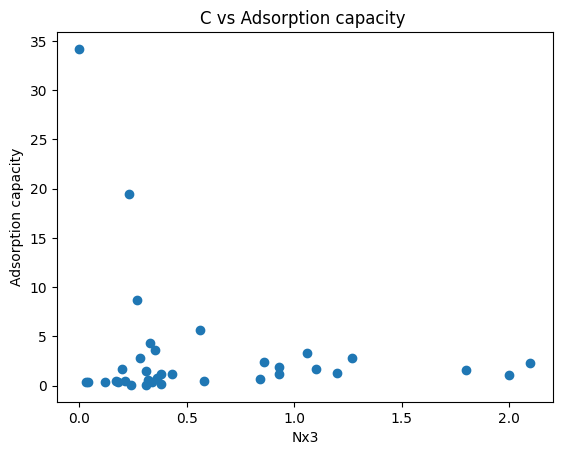

In [36]:
fig, ax = plt.subplots()
k=df.drop(columns=['C(x1)'	,'H(x2)'		,'Si(x4)',	'BET(x5)','Adorption Capacity(output)'])
ax.plot(k, y, 'o')


# Set the title and axis labels
ax.set_title('C vs Adsorption capacity ')
ax.set_xlabel('Nx3')
ax.set_ylabel('Adsorption capacity')

# Show the plot
plt.show()

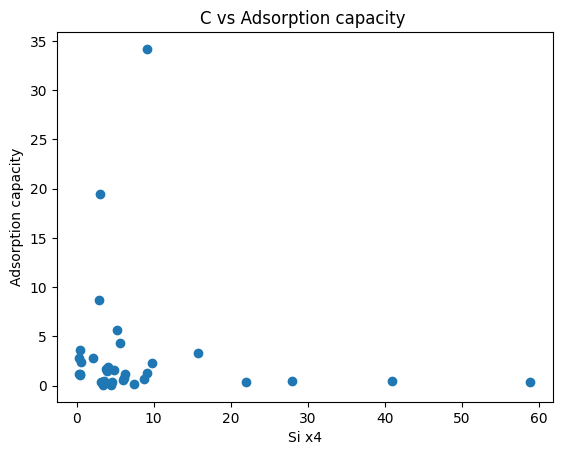

In [37]:
fig, ax = plt.subplots()
k=df.drop(columns=['C(x1)'	,'H(x2)'		,'N(x3)',	'BET(x5)','Adorption Capacity(output)'])
ax.plot(k, y, 'o')


# Set the title and axis labels
ax.set_title('C vs Adsorption capacity ')
ax.set_xlabel('Si x4')
ax.set_ylabel('Adsorption capacity')

# Show the plot
plt.show()

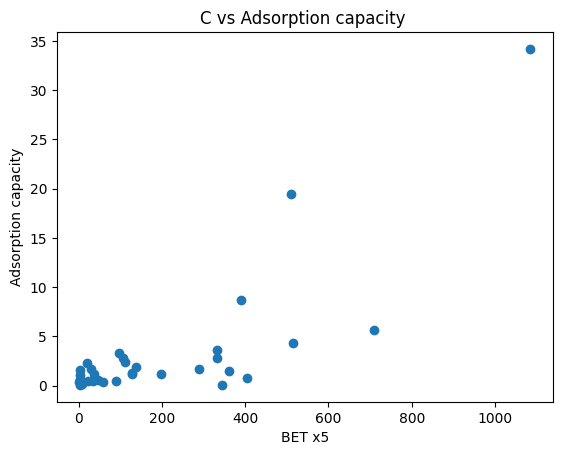

In [38]:
fig, ax = plt.subplots()
k=df.drop(columns=['C(x1)'	,'H(x2)'		,'Si(x4)',	'N(x3)','Adorption Capacity(output)'])
ax.plot(k, y, 'o')


# Set the title and axis labels
ax.set_title('C vs Adsorption capacity ')
ax.set_xlabel('BET x5')
ax.set_ylabel('Adsorption capacity')

# Show the plot
plt.show()